In [ ]:
import os
os.chdir('/kaggle/input/functions')
from functions import *

In [ ]:
!ls

functions.py


In [ ]:
import tensorflow
from tensorflow.keras.layers import LSTM, Dense, Softmax, BatchNormalization
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

2024-02-20 18:58:56.558955: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 18:58:56.559045: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 18:58:56.683518: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
import pandas as pd
import numpy as np
import pickle
from functions import *
os.chdir('/kaggle/input/mydatasets2')
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
help(preprocess_data_equal_division)

Help on function preprocess_data_equal_division in module functions:

preprocess_data_equal_division(file_path, split=True, time_steps=10, num_stocks=30, le=False, only_close=False, equal_split=True, min_change=1e-05)



In [ ]:
num_features = 4 # Number of features in the data (Example: Low, High, etc)
num_stocks = 100 # The dataset is a list of 2000 stock dataframes. num_stocks is the number of stocks to consider for training (Matter of RAM capacity)
num_epochs = 20
batch_size=64
units = 128
models_dict = {}
train_metrics_dict = {}
valid_metrics_dict = {}
test_metrics_dict = {}
for k in tqdm(range(10, 101, 10)):
    time_steps = k # Time steps to consider
    model = Sequential((LSTM(units, input_shape=(time_steps, 4), return_sequences=True),
                       LSTM(2*units, return_sequences=False),
                       Dense(256, activation='relu'),
                       Dense(128, activation='relu'),
                       Dense(3),
                       Softmax()))
    model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.01), metrics='Accuracy')
    callbacks = [EarlyStopping(patience=15, restore_best_weights=True, min_delta=1e-4), ReduceLROnPlateau(verbose=True)]
    x_train, x_valid, y_train, y_valid = preprocess_data_equal_division('training_set1.pkl',split = True, time_steps=time_steps, num_stocks = num_stocks,
                                            only_close=False,
                                            equal_split=False)
    model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics='Accuracy')
    callbacks = [EarlyStopping(patience=15, restore_best_weights=True, min_delta=1e-4), ReduceLROnPlateau(verbose=True)]
    model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=num_epochs, batch_size=batch_size)
    models_dict[time_steps] = clone_model(model)
    print(f"Time steps = {time_steps}")
    train_metrics_dict[time_steps] = metric_calculations_categorical(model, x_train, y_train, set_="Training set")
    valid_metrics_dict[time_steps] = metric_calculations_categorical(model, x_valid, y_valid, set_="Validation set")
    x_test, y_test = preprocess_data_equal_division('training_set11.pkl', split=False, time_steps=time_steps, num_stocks = num_stocks,
                                            only_close=False,
                                            equal_split=False)
    test_metrics_dict[time_steps] = metric_calculations_categorical(model, x_test, y_test, set_="Test set")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/20


I0000 00:00:1708455680.828510      99 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2740/2740 [==============================] - 20s 6ms/step - loss: 0.7969 - Accuracy: 0.4906 - val_loss: 0.7944 - val_Accuracy: 0.4955
Epoch 2/20
2740/2740 [==============================] - 15s 6ms/step - loss: 0.7946 - Accuracy: 0.4929 - val_loss: 0.7944 - val_Accuracy: 0.4950
Epoch 3/20
2740/2740 [==============================] - 15s 6ms/step - loss: 0.7941 - Accuracy: 0.4933 - val_loss: 0.7952 - val_Accuracy: 0.4844
Epoch 4/20
2740/2740 [==============================] - 15s 6ms/step - loss: 0.7938 - Accuracy: 0.4935 - val_loss: 0.7941 - val_Accuracy: 0.4961
Epoch 5/20
2740/2740 [==============================] - 15s 6ms/step - loss: 0.7938 - Accuracy: 0.4922 - val_loss: 0.7950 - val_Accuracy: 0.4950
Epoch 6/20
2740/2740 [==============================] - 15s 6ms/step - loss: 0.7935 - Accuracy: 0.4941 - val_loss: 0.7947 - val_Accuracy: 0.4935
Epoch 7/20
2740/2740 [==============================] - 15s 6ms/step - loss: 0.7935 - Accuracy: 0.4944 - val_loss: 0.7940 - val_Accuracy: 0.4

 10%|█         | 1/10 [08:41<1:18:14, 521.63s/it]

For Test set
  Accuracy: 49.0193401592719,
  Precision: 48.905548174859234,
  Recall: 35.04306436990027,
  Specificity: 63.104157149383276,
  F1score: 40.82974621702274
Epoch 1/20
2728/2728 [==============================] - 23s 7ms/step - loss: 0.7974 - Accuracy: 0.4909 - val_loss: 0.7950 - val_Accuracy: 0.4907
Epoch 2/20
2728/2728 [==============================] - 19s 7ms/step - loss: 0.7949 - Accuracy: 0.4934 - val_loss: 0.7919 - val_Accuracy: 0.4941
Epoch 3/20
2728/2728 [==============================] - 19s 7ms/step - loss: 0.7946 - Accuracy: 0.4936 - val_loss: 0.7938 - val_Accuracy: 0.4899
Epoch 4/20
2728/2728 [==============================] - 19s 7ms/step - loss: 0.7944 - Accuracy: 0.4935 - val_loss: 0.7929 - val_Accuracy: 0.4885
Epoch 5/20
2728/2728 [==============================] - 19s 7ms/step - loss: 0.7943 - Accuracy: 0.4946 - val_loss: 0.7928 - val_Accuracy: 0.4885
Epoch 6/20
2728/2728 [==============================] - 19s 7ms/step - loss: 0.7943 - Accuracy: 0.4946 - v

 20%|██        | 2/10 [18:35<1:15:11, 563.90s/it]

For Test set
  Accuracy: 48.94706559263521,
  Precision: 48.88938615913695,
  Recall: 97.72122695920336,
  Specificity: 2.3052160014407597,
  F1score: 65.17305533531679
Epoch 1/20
2715/2715 [==============================] - 25s 8ms/step - loss: 0.7973 - Accuracy: 0.4915 - val_loss: 0.7928 - val_Accuracy: 0.4903
Epoch 2/20
2715/2715 [==============================] - 21s 8ms/step - loss: 0.7952 - Accuracy: 0.4926 - val_loss: 0.7929 - val_Accuracy: 0.4920
Epoch 3/20
2715/2715 [==============================] - 21s 8ms/step - loss: 0.7951 - Accuracy: 0.4922 - val_loss: 0.7930 - val_Accuracy: 0.4920
Epoch 4/20
2715/2715 [==============================] - 21s 8ms/step - loss: 0.7947 - Accuracy: 0.4927 - val_loss: 0.7922 - val_Accuracy: 0.4935
Epoch 5/20
2715/2715 [==============================] - 21s 8ms/step - loss: 0.7944 - Accuracy: 0.4921 - val_loss: 0.7923 - val_Accuracy: 0.4955
Epoch 6/20
2715/2715 [==============================] - 21s 8ms/step - loss: 0.7941 - Accuracy: 0.4939 - v

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2703/2703 [==============================] - 26s 10ms/step - loss: 0.7947 - Accuracy: 0.4928 - val_loss: 0.7914 - val_Accuracy: 0.4957
Epoch 6/20
2703/2703 [==============================] - 26s 10ms/step - loss: 0.7947 - Accuracy: 0.4908 - val_loss: 0.7932 - val_Accuracy: 0.4905
Epoch 7/20
2703/2703 [==============================] - 26s 10ms/step - loss: 0.7945 - Accuracy: 0.4913 - val_loss: 0.7911 - val_Accuracy: 0.4935
Epoch 8/20
2703/2703 [==============================] - 26s 10ms/step - loss: 0.7946 - Accuracy: 0.4920 - val_loss: 0.7910 - val_Accuracy: 0.4989
Epoch 9/20
2703/2703 [==============================] - 26s 10ms/step - loss: 0.7942 - Accuracy: 0.4933 - val_loss: 0.7907 - val_Accuracy: 0.5020
Epoch 10/20
2703/2703 [==============================] - 26s 10ms/step - loss: 0.7943 - Accuracy: 0.4957 - val_loss: 0.7911 - val_Accuracy: 0.5020
Epoch 11/20
2145/2703 [======================>.......] - ETA: 4s - loss: 0.7936 - Accuracy: 0.4954

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 1/20
2690/2690 [==============================] - 33s 11ms/step - loss: 0.7972 - Accuracy: 0.4907 - val_loss: 0.8028 - val_Accuracy: 0.4914
Epoch 2/20
2690/2690 [==============================] - 29s 11ms/step - loss: 0.7947 - Accuracy: 0.4934 - val_loss: 0.7958 - val_Accuracy: 0.4945
Epoch 3/20
2690/2690 [==============================] - 29s 11ms/step - loss: 0.7941 - Accuracy: 0.4949 - val_loss: 0.7953 - val_Accuracy: 0.4920
Epoch 4/20
2690/2690 [==============================] - 29s 11ms/step - loss: 0.7940 - Accuracy: 0.4933 - val_loss: 0.7955 - val_Accuracy: 0.4949
Epoch 5/20
2690/2690 [==============================] - 29s 11ms/step - loss: 0.7938 - Accuracy: 0.4922 - val_loss: 0.7955 - val_Accuracy: 0.4901
Epoch 6/20
2690/2690 [==============================] - 29s 11ms/step - loss: 0.7949 - Accuracy: 0.4926 - val_loss: 0.7970 - val_Accuracy: 0.4906
Epoch 7/20
2690/2690 [==============================] - 29s 11ms/step - loss: 0.7948 - Accuracy: 0.4921 - val_loss: 0.7971 -

 50%|█████     | 5/10 [54:52<58:58, 707.75s/it]  

For Test set
  Accuracy: 48.6865315852205,
  Precision: 48.59439247692518,
  Recall: 95.9033072642134,
  Specificity: 4.012896940456033,
  F1score: 64.50432029549502
Epoch 1/20
2678/2678 [==============================] - 38s 13ms/step - loss: 0.7973 - Accuracy: 0.4900 - val_loss: 0.7953 - val_Accuracy: 0.4944
Epoch 2/20
2678/2678 [==============================] - 34s 13ms/step - loss: 0.7950 - Accuracy: 0.4915 - val_loss: 0.7954 - val_Accuracy: 0.4926
Epoch 3/20
2678/2678 [==============================] - 33s 13ms/step - loss: 0.7945 - Accuracy: 0.4930 - val_loss: 0.7941 - val_Accuracy: 0.4934
Epoch 4/20
2678/2678 [==============================] - 34s 13ms/step - loss: 0.7947 - Accuracy: 0.4953 - val_loss: 0.7941 - val_Accuracy: 0.4948
Epoch 5/20
2678/2678 [==============================] - 34s 13ms/step - loss: 0.7942 - Accuracy: 0.4934 - val_loss: 0.7936 - val_Accuracy: 0.4943
Epoch 6/20
2678/2678 [==============================] - 33s 13ms/step - loss: 0.7943 - Accuracy: 0.4946 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 1/20
2665/2665 [==============================] - 42s 14ms/step - loss: 0.7973 - Accuracy: 0.4908 - val_loss: 0.7956 - val_Accuracy: 0.4889
Epoch 2/20
2665/2665 [==============================] - 38s 14ms/step - loss: 0.7946 - Accuracy: 0.4953 - val_loss: 0.7967 - val_Accuracy: 0.4906
Epoch 3/20
2665/2665 [==============================] - 38s 14ms/step - loss: 0.7942 - Accuracy: 0.4928 - val_loss: 0.7947 - val_Accuracy: 0.4909
Epoch 4/20
2665/2665 [==============================] - 38s 14ms/step - loss: 0.7940 - Accuracy: 0.4934 - val_loss: 0.7951 - val_Accuracy: 0.4938
Epoch 5/20
2665/2665 [==============================] - 38s 14ms/step - loss: 0.7939 - Accuracy: 0.4931 - val_loss: 0.7948 - val_Accuracy: 0.4941
Epoch 6/20
2665/2665 [==============================] - 38s 14ms/step - loss: 0.7938 - Accuracy: 0.4930 - val_loss: 0.7950 - val_Accuracy: 0.4946
Epoch 7/20
2665/2665 [==============================] - 38s 14ms/step - loss: 0.7936 - Accuracy: 0.4944 - val_loss: 0.7946 -

 70%|███████   | 7/10 [1:26:02<41:54, 838.14s/it]

For Test set
  Accuracy: 49.03052503052503,
  Precision: 48.612823674475955,
  Recall: 3.7859509290824414,
  Specificity: 95.8579734632013,
  F1score: 7.024811795625641
Epoch 1/20
2653/2653 [==============================] - 45s 16ms/step - loss: 0.7977 - Accuracy: 0.4910 - val_loss: 0.7974 - val_Accuracy: 0.4910
Epoch 2/20
2653/2653 [==============================] - 41s 15ms/step - loss: 0.7954 - Accuracy: 0.4917 - val_loss: 0.7929 - val_Accuracy: 0.4944
Epoch 3/20
2653/2653 [==============================] - 41s 15ms/step - loss: 0.7950 - Accuracy: 0.4928 - val_loss: 0.7944 - val_Accuracy: 0.4910
Epoch 4/20
2653/2653 [==============================] - 41s 15ms/step - loss: 0.7946 - Accuracy: 0.4938 - val_loss: 0.7925 - val_Accuracy: 0.4941
Epoch 5/20
 465/2653 [====>.........................] - ETA: 30s - loss: 0.7935 - Accuracy: 0.4927

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2653/2653 [==============================] - 41s 15ms/step - loss: 0.7953 - Accuracy: 0.4927 - val_loss: 0.7961 - val_Accuracy: 0.4916
Epoch 12/20
2653/2653 [==============================] - 41s 15ms/step - loss: 0.7945 - Accuracy: 0.4947 - val_loss: 0.7961 - val_Accuracy: 0.4929
Epoch 13/20
2653/2653 [==============================] - 41s 15ms/step - loss: 0.7944 - Accuracy: 0.4946 - val_loss: 0.7942 - val_Accuracy: 0.4902
Epoch 14/20
2653/2653 [==============================] - 41s 15ms/step - loss: 0.7942 - Accuracy: 0.4937 - val_loss: 0.7932 - val_Accuracy: 0.4944
Epoch 15/20
1413/2653 [==============>...............] - ETA: 17s - loss: 0.7948 - Accuracy: 0.4969

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5305/5305 [==============================] - 25s 5ms/step
For Training set
  Accuracy: 49.33435438265787,
  Precision: 50.566845564734976,
  Recall: 19.414025420785773,
  Specificity: 80.33559622904023,
  F1score: 28.05641059957173
1327/1327 [==============================] - 7s 5ms/step
For Validation set
  Accuracy: 49.22478793590952,
  Precision: 49.93975903614458,
  Recall: 19.24416175309903,
  Specificity: 80.12056839385676,
  F1score: 27.782432387144336
2529/2529 [==============================] - 12s 5ms/step


 80%|████████  | 8/10 [1:43:30<30:10, 905.02s/it]

For Test set
  Accuracy: 49.05191594561187,
  Precision: 49.101412066752246,
  Recall: 7.444349835786401,
  Specificity: 92.02914939062697,
  F1score: 12.92857595538374
Epoch 1/20
2640/2640 [==============================] - 49s 17ms/step - loss: 0.7967 - Accuracy: 0.4907 - val_loss: 0.7977 - val_Accuracy: 0.4870
Epoch 2/20
2640/2640 [==============================] - 45s 17ms/step - loss: 0.7946 - Accuracy: 0.4927 - val_loss: 0.7967 - val_Accuracy: 0.4870
Epoch 3/20
2640/2640 [==============================] - 45s 17ms/step - loss: 0.7940 - Accuracy: 0.4951 - val_loss: 0.7968 - val_Accuracy: 0.4870
Epoch 4/20
2640/2640 [==============================] - 45s 17ms/step - loss: 0.7939 - Accuracy: 0.4935 - val_loss: 0.7963 - val_Accuracy: 0.4888
Epoch 5/20
2640/2640 [==============================] - 45s 17ms/step - loss: 0.7935 - Accuracy: 0.4940 - val_loss: 0.7967 - val_Accuracy: 0.4870
Epoch 6/20
2640/2640 [==============================] - 45s 17ms/step - loss: 0.7935 - Accuracy: 0.49

 90%|█████████ | 9/10 [2:02:20<16:15, 975.55s/it]

For Test set
  Accuracy: 48.65707133917397,
  Precision: 48.25539506638762,
  Recall: 72.1485547205622,
  Specificity: 26.269218547578895,
  F1score: 57.831275762466205
Epoch 1/20
2628/2628 [==============================] - 52s 19ms/step - loss: 0.7979 - Accuracy: 0.4894 - val_loss: 0.7962 - val_Accuracy: 0.4944
Epoch 2/20
2628/2628 [==============================] - 48s 18ms/step - loss: 0.7952 - Accuracy: 0.4914 - val_loss: 0.7940 - val_Accuracy: 0.4951
Epoch 3/20
2628/2628 [==============================] - 48s 18ms/step - loss: 0.7947 - Accuracy: 0.4921 - val_loss: 0.7937 - val_Accuracy: 0.4952
Epoch 4/20
1379/2628 [==============>...............] - ETA: 20s - loss: 0.7941 - Accuracy: 0.4941

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2628/2628 [==============================] - 48s 18ms/step - loss: 0.7938 - Accuracy: 0.4941 - val_loss: 0.7933 - val_Accuracy: 0.4981
Epoch 13/20
2628/2628 [==============================] - 48s 18ms/step - loss: 0.7935 - Accuracy: 0.4950 - val_loss: 0.7935 - val_Accuracy: 0.4957
Epoch 14/20
2628/2628 [==============================] - 48s 18ms/step - loss: 0.7936 - Accuracy: 0.4955 - val_loss: 0.7947 - val_Accuracy: 0.4901
Epoch 15/20
2628/2628 [==============================] - 48s 18ms/step - loss: 0.7936 - Accuracy: 0.4935 - val_loss: 0.7940 - val_Accuracy: 0.4946
Epoch 16/20
2628/2628 [==============================] - 48s 18ms/step - loss: 0.7936 - Accuracy: 0.4937 - val_loss: 0.7932 - val_Accuracy: 0.4963
Epoch 17/20
1264/2628 [=============>................] - ETA: 22s - loss: 0.7910 - Accuracy: 0.4977

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
lis = [models_dict,
train_metrics_dict,
valid_metrics_dict,
test_metrics_dict]

In [ ]:
file_path = '/kaggle/working/lstm_olhv_100.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(lis, file)

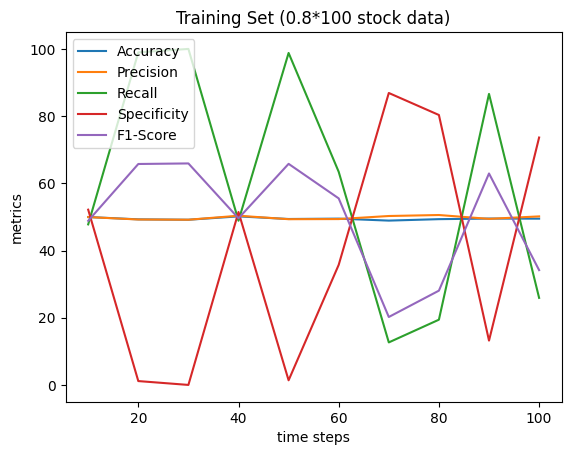

In [ ]:
num_stocks=100
valid_split = 0.2
# train metrics plot
import matplotlib.pyplot as plt
x = train_metrics_dict.keys()
y = train_metrics_dict.values()
plt.plot(x, y, label=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score'])
plt.legend()
plt.xlabel('time steps')
plt.ylabel('metrics')
plt.title(f'Training Set ({1-valid_split}*{num_stocks} stock data)')
plt.show()

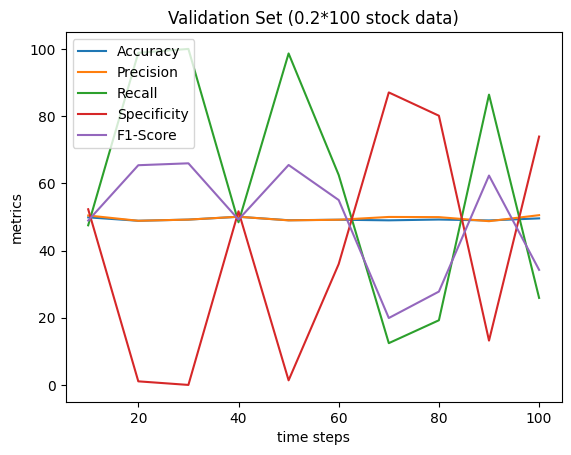

In [ ]:
# valid metrics plot
import matplotlib.pyplot as plt
x = valid_metrics_dict.keys()
y = valid_metrics_dict.values()
plt.plot(x, y, label=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score'])
plt.legend()
plt.xlabel('time steps')
plt.ylabel('metrics')
plt.title(f'Validation Set ({valid_split}*{num_stocks} stock data)')
plt.show()

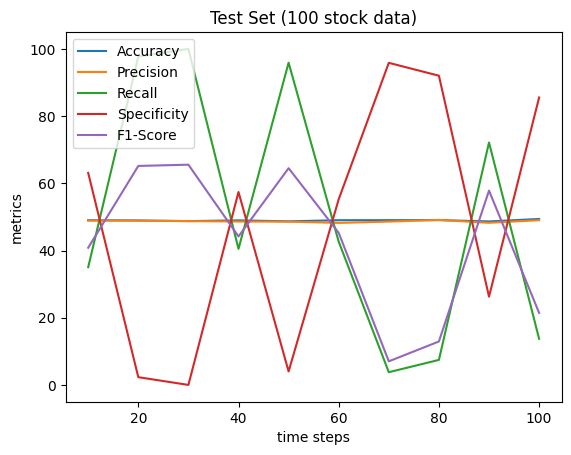

In [ ]:
# test metrics plot
import matplotlib.pyplot as plt
x = test_metrics_dict.keys()
y = test_metrics_dict.values()
plt.plot(x, y, label=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score'])
plt.legend()
plt.xlabel('time steps')
plt.ylabel('metrics')
plt.title(f'Test Set ({num_stocks} stock data)')
plt.show()